In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random


# read csv
file = "data_base_clean.csv"
df = pd.read_csv(file, encoding="ISO-8859-1")
df.head()

,id,name,host_id,host_name,neighbourhood_cleansed,neighbourhood,zipcode,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,bed_type,amenities,review_scores_rating
0,22787,"Sunny suite w/ queen size bed, inside boutique...",87973,Diego,Cuauhtemoc,San Rafael,6470,19.44076,-99.16324,Private room,1957,1,10,11/05/2018,0.58,8,0,Real Bed,"{Wifi,""Paid parking off premises"",Breakfast,Wa...",87.0
1,44616,CONDESA HAUS BOUTIQUE B&B,196253,Condesa Haus Bed & BReakfast CDMX,Cuauhtemoc,Condesa,6140,19.41006,-99.17645,Private room,1906,1,39,02/05/2019,0.43,10,330,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Free parking on ...",89.0
2,58955,Entire beautiful duplex in la Roma,282620,Nat,Cuauhtemoc,Roma Norte,6700,19.42292,-99.15775,Entire home/apt,1620,3,37,01/01/2019,0.41,1,173,Real Bed,"{Internet,Wifi,""Wheelchair accessible"",Kitchen...",100.0
3,61792,Spacious Clean Quiet room (own bath) in la Con...,299558,Roberto,Cuauhtemoc,Condesa,6140,19.41259,-99.17959,Private room,953,2,51,05/04/2019,2.69,3,180,Real Bed,"{TV,Wifi,Kitchen,""Free street parking"",Heating...",98.0
4,67703,"2 bedroom apt. deco bldg, Condesa",334451,Nicholas,Cuauhtemoc,Hipodromo,6100,19.41375,-99.17028,Entire home/apt,1810,2,39,24/02/2019,0.43,3,340,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",98.0


In [2]:
df.count()

id                                10696
name                              10696
host_id                           10696
host_name                         10696
neighbourhood_cleansed            10696
neighbourhood                     10696
zipcode                           10696
latitude                          10696
longitude                         10696
room_type                         10696
price                             10696
minimum_nights                    10696
number_of_reviews                 10696
last_review                       10696
reviews_per_month                 10696
calculated_host_listings_count    10696
availability_365                  10696
bed_type                          10696
amenities                         10696
review_scores_rating              10696
dtype: int64

In [3]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_cleansed',
       'neighbourhood', 'zipcode', 'latitude', 'longitude', 'room_type',
       'price', 'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'bed_type', 'amenities', 'review_scores_rating'],
      dtype='object')

In [4]:
# Remove properties with no price per night
airbnb_positive_df = df.loc[df["price"]>0,["id","neighbourhood_cleansed","neighbourhood",
                                        "zipcode","latitude","longitude","price"]]
airbnb_positive_df.head()

,id,neighbourhood_cleansed,neighbourhood,zipcode,latitude,longitude,price
0,22787,Cuauhtemoc,San Rafael,6470,19.44076,-99.16324,1957
1,44616,Cuauhtemoc,Condesa,6140,19.41006,-99.17645,1906
2,58955,Cuauhtemoc,Roma Norte,6700,19.42292,-99.15775,1620
3,61792,Cuauhtemoc,Condesa,6140,19.41259,-99.17959,953
4,67703,Cuauhtemoc,Hipodromo,6100,19.41375,-99.17028,1810


In [5]:
# Remove properties with price per night higher than 37,000
airbnb_positive1_df = airbnb_positive_df.loc[airbnb_positive_df["price"]<37000,["id","neighbourhood_cleansed",
                                        "neighbourhood","zipcode","latitude","longitude","price"]]
airbnb_positive1_df.head()

,id,neighbourhood_cleansed,neighbourhood,zipcode,latitude,longitude,price
0,22787,Cuauhtemoc,San Rafael,6470,19.44076,-99.16324,1957
1,44616,Cuauhtemoc,Condesa,6140,19.41006,-99.17645,1906
2,58955,Cuauhtemoc,Roma Norte,6700,19.42292,-99.15775,1620
3,61792,Cuauhtemoc,Condesa,6140,19.41259,-99.17959,953
4,67703,Cuauhtemoc,Hipodromo,6100,19.41375,-99.17028,1810


In [6]:
#airbnb_positive1_df.count()

In [7]:
#Check data types
#airbnb_positive1_df.dtypes

In [8]:
#Review prices
#price = df["price"].unique()
#len(price)

In [9]:
#Group County and Neighbourhood
county_neig = airbnb_positive1_df.groupby(["neighbourhood_cleansed","neighbourhood"])

max_price = county_neig['price'].max()
min_price = county_neig['price'].min()
mean_price = county_neig['price'].mean()

#Create a summary data frame to hold the results
county_neig_df = pd.DataFrame({"Maximum Price":max_price,
                                 "Minimum Price":min_price,
                                 "Average Price":mean_price})
county_neig_df.head()

Maximum Price  Minimum Price  \
neighbourhood_cleansed neighbourhood                                           
Alvaro Obregon         Campestre/Guadalupe Inn           6251            190   
                       Coyoacan                          1334           1334   
                       Florida/Axotla                    2280            248   
                       Insurgentes                       1296            686   
                       Nonoalco                          1277            191   

                                                Average Price  
neighbourhood_cleansed neighbourhood                           
Alvaro Obregon         Campestre/Guadalupe Inn     955.611111  
                       Coyoacan                   1334.000000  
                       Florida/Axotla              787.392157  
                       Insurgentes                1010.000000  
                       Nonoalco                    653.272727

# Price summary

In [77]:
#Group by County (descending price)
county = airbnb_positive1_df.groupby(["neighbourhood_cleansed"])

max_price = county['price'].max()
min_price = county['price'].min()
mean_price = county['price'].mean()
county_properties = county['neighbourhood_cleansed'].count()

#Create a summary data frame to hold the results
county_df = pd.DataFrame({"Maximum Price":max_price,
                          "Minimum Price":min_price,
                          "Average Price":mean_price,
                          "Number of properties":county_properties})

descending_county_df = county_df.sort_values("Maximum Price", ascending = True)

descending_county_df["Maximum Price"] = descending_county_df["Maximum Price"].map("${:,.2f}".format)
descending_county_df["Minimum Price"] = descending_county_df["Minimum Price"].map("${:,.2f}".format)
descending_county_df["Average Price"] = descending_county_df["Average Price"].map("${:,.2f}".format)
descending_county_df

,Maximum Price,Minimum Price,Average Price,Number of properties
neighbourhood_cleansed,,,,
Iztacalco,"$1,296.00",$210.00,$444.31,32
Azcapotzalco,"$1,748.00",$190.00,$651.89,27
Gustavo A. Madero,"$1,824.00",$209.00,$609.58,12
Iztapalapa,"$2,001.00",$229.00,$700.13,15
Venustiano Carranza,"$4,193.00",$191.00,$634.88,24
Alvaro Obregon,"$6,251.00",$172.00,$870.70,264
Benito Juarez,"$23,974.00",$172.00,$706.93,2009
Coyoacan,"$28,586.00",$172.00,$892.86,748
Miguel Hidalgo,"$34,303.00",$191.00,"$1,466.39",1881


In [11]:
#Group by County
county1 = airbnb_positive1_df.groupby(["neighbourhood_cleansed"])

max_price = county1['price'].max()
min_price = county1['price'].min()
mean_price = county1['price'].mean()
county_properties = county1['neighbourhood_cleansed'].count()

#Create a summary data frame to hold the results
county1_df = pd.DataFrame({"Maximum Price":max_price,
                          "Minimum Price":min_price,
                          "Average Price":mean_price,
                          "Number of properties":county_properties})

county1_df.head()

,Maximum Price,Minimum Price,Average Price,Number of properties
neighbourhood_cleansed,,,,
Alvaro Obregon,6251,172,870.700758,264
Azcapotzalco,1748,190,651.888889,27
Benito Juarez,23974,172,706.930314,2009
Coyoacan,28586,172,892.862299,748
Cuauhtemoc,36484,172,1188.152450,5674


In [12]:
# index to column
county1_df['neighbourhood_cleansed'] = county1_df.index
county1_df.head()

,Maximum Price,Minimum Price,Average Price,Number of properties,neighbourhood_cleansed
neighbourhood_cleansed,,,,,
Alvaro Obregon,6251,172,870.700758,264,Alvaro Obregon
Azcapotzalco,1748,190,651.888889,27,Azcapotzalco
Benito Juarez,23974,172,706.930314,2009,Benito Juarez
Coyoacan,28586,172,892.862299,748,Coyoacan
Cuauhtemoc,36484,172,1188.152450,5674,Cuauhtemoc


In [13]:
# neighbourhood
result_county = county1_df["neighbourhood_cleansed"].tolist()
result_county

['Alvaro Obregon',
 'Azcapotzalco',
 'Benito Juarez',
 'Coyoacan',
 'Cuauhtemoc',
 'Gustavo A. Madero',
 'Iztacalco',
 'Iztapalapa',
 'Miguel Hidalgo',
 'Venustiano Carranza']

In [14]:
# maximum price to list
max_price = county1_df["Maximum Price"].tolist()
max_price

[6251, 1748, 23974, 28586, 36484, 1824, 1296, 2001, 34303, 4193]

In [15]:
# minimum price to list
min_price = county1_df["Minimum Price"].tolist()
min_price

[172, 190, 172, 172, 172, 209, 210, 229, 191, 191]

In [16]:
# average price to list
avg_price = county1_df["Average Price"].tolist()
avg_price

[870.7007575757576,
 651.8888888888889,
 706.9303135888501,
 892.8622994652407,
 1188.1524497708847,
 609.5833333333334,
 444.3125,
 700.1333333333333,
 1466.3923444976076,
 634.875]

## Bar chart

In [17]:
final_county = result_county
x_axis = np.arange(len(final_county))

<function matplotlib.pyplot.show(*args, **kw)>

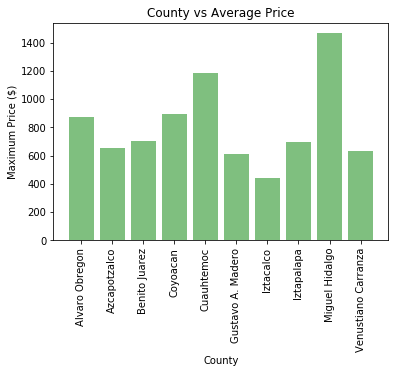

In [60]:
#plt.bar(x_axis, min_price, color='b', alpha=0.5, align="center")
#plt.bar(x_axis, max_price, color='r', alpha=0.5, align="center")
plt.bar(x_axis, avg_price, color='g', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, result_county, rotation='vertical')
plt.title("County vs Average Price")
plt.xlabel("County")
plt.ylabel("Average Price ($)")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

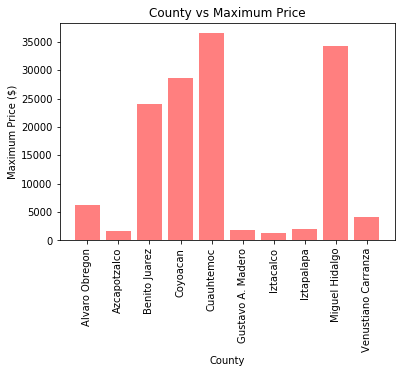

In [61]:
#plt.bar(x_axis, min_price, color='b', alpha=0.5, align="center")
plt.bar(x_axis, max_price, color='r', alpha=0.5, align="center")
#plt.bar(x_axis, avg_price, color='g', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, result_county, rotation='vertical')
plt.title("County vs Maximum Price")
plt.xlabel("County")
plt.ylabel("Maximum Price ($)")
plt.show

# Scatter chart

In [ ]:
#plt.bar(x_axis, min_price, color='b', alpha=0.5, align="center")
plt.bar(x_axis, max_price, color='r', alpha=0.5, align="center")
#plt.bar(x_axis, avg_price, color='g', alpha=0.5, align="center")

<function matplotlib.pyplot.show(*args, **kw)>

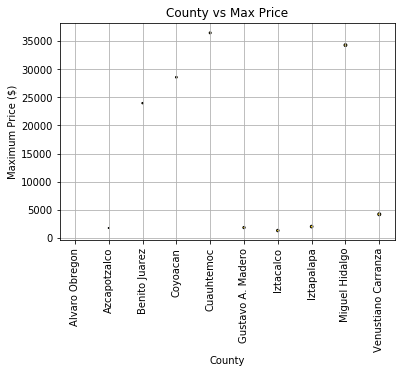

In [70]:
plt.scatter(result_county, max_price, marker="o", facecolors="gold", edgecolors="black",
            s=x_axis, alpha=1)
plt.title("County vs Max Price")
plt.xlabel("County")
plt.ylabel("Maximum Price ($)")
plt.xticks(tick_locations, result_county, rotation='vertical')
plt.grid()
plt.show

# p-value

In [51]:
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [52]:
#Group by County
county12 = airbnb_positive1_df.groupby(["neighbourhood_cleansed"])

mean_price = county12['price'].mean()

#Create a summary data frame to hold the results
county12_df = pd.DataFrame({"Average":mean_price})
county12_df.head()

,Average
neighbourhood_cleansed,
Alvaro Obregon,870.700758
Azcapotzalco,651.888889
Benito Juarez,706.930314
Coyoacan,892.862299
Cuauhtemoc,1188.152450


In [53]:
#county12_df['neighbourhood_cleansed'] = county12_df.index
#county12_df.head()

In [54]:
df2 = county12_df.assign(index1 = ['1', '2', '3', '4','5', '6', '7', '8','9','10'])
#df2['neighbourhood'].astype(str).astype(int)

df2

,Average,index1
neighbourhood_cleansed,,
Alvaro Obregon,870.700758,1
Azcapotzalco,651.888889,2
Benito Juarez,706.930314,3
Coyoacan,892.862299,4
Cuauhtemoc,1188.152450,5
Gustavo A. Madero,609.583333,6
Iztacalco,444.312500,7
Iztapalapa,700.133333,8
Miguel Hidalgo,1466.392344,9


In [72]:
df2["index1"] = df2["index1"].astype(int)
df2

,Average,index1
neighbourhood_cleansed,,
Alvaro Obregon,870.700758,1
Azcapotzalco,651.888889,2
Benito Juarez,706.930314,3
Coyoacan,892.862299,4
Cuauhtemoc,1188.152450,5
Gustavo A. Madero,609.583333,6
Iztacalco,444.312500,7
Iztapalapa,700.133333,8
Miguel Hidalgo,1466.392344,9


In [73]:
df2.dtypes

Average    float64
index1       int64
dtype: object

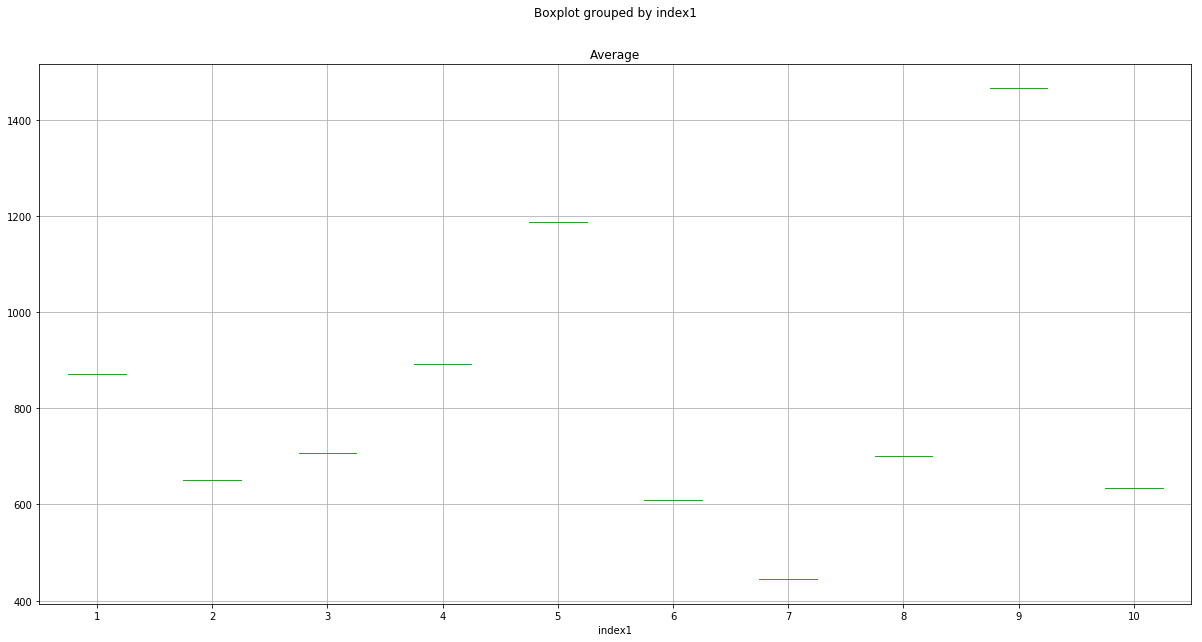

In [74]:
# Create a boxplot to compare means
df2.boxplot("Average", by="index1", figsize=(20, 10))

In [75]:
# Extract individual groups
group1 = df2[df2["index1"] == 1]["Average"]
group2 = df2[df2["index1"] == 2]["Average"]
group3 = df2[df2["index1"] == 3]["Average"]
group4 = df2[df2["index1"] == 4]["Average"]
group5 = df2[df2["index1"] == 5]["Average"]
group6 = df2[df2["index1"] == 6]["Average"]
group7 = df2[df2["index1"] == 7]["Average"]
group8 = df2[df2["index1"] == 8]["Average"]
group9 = df2[df2["index1"] == 9]["Average"]
group10 = df2[df2["index1"] == 10]["Average"]

In [76]:
# Perform the ANOVA
stats.f_oneway(group1, group2, group3, group4, group5, group6, group7, group8, group9, group10)

F_onewayResult(statistic=nan, pvalue=nan)